# DataClean

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "D:/datasets/loan_dataset.csv"
loan_data = pd.read_csv(file_path)

In [4]:
# Exploración inicial
info = loan_data.info()
head = loan_data.head()
shape = loan_data.shape

info, head, shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_id               1000 non-null   object 
 1   customer_age          1000 non-null   int64  
 2   loan_amount           1000 non-null   int64  
 3   interest_rate         1000 non-null   float64
 4   loan_duration_months  1000 non-null   int64  
 5   loan_status           1000 non-null   object 
 6   customer_income       1000 non-null   int64  
 7   loan_purpose          1000 non-null   object 
 8   credit_score          1000 non-null   int64  
 9   state                 1000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 78.2+ KB


(None,
     loan_id  customer_age  loan_amount  interest_rate  loan_duration_months  \
 0  LN000001            56        40650           3.42                    60   
 1  LN000002            69        35674           6.19                    12   
 2  LN000003            46        36854          12.37                    48   
 3  LN000004            32        47271          18.81                    36   
 4  LN000005            60         9152          15.85                    48   
 
   loan_status  customer_income loan_purpose  credit_score state  
 0    approved           101483    education           724    TX  
 1    approved            74754         home           554    IL  
 2    approved            44978          car           728    NY  
 3     pending           102592          car           733    NY  
 4    approved           109543          car           506    NY  ,
 (1000, 10))

In [5]:
# Estadísticas descriptivas de las columnas numéricas
numeric_stats = loan_data.describe()

# Detección de valores nulos y duplicados
null_values = loan_data.isnull().sum()
duplicated_rows = loan_data.duplicated().sum()

numeric_stats, null_values, duplicated_rows


(       customer_age   loan_amount  interest_rate  loan_duration_months  \
 count    1000.00000   1000.000000    1000.000000           1000.000000   
 mean       43.81900  25239.007000      13.501250             36.108000   
 std        14.99103  14109.045451       6.392204             17.076063   
 min        18.00000   1009.000000       2.500000             12.000000   
 25%        31.00000  12686.500000       7.825000             24.000000   
 50%        44.00000  25073.500000      13.410000             36.000000   
 75%        56.00000  37226.000000      19.060000             48.000000   
 max        69.00000  49988.000000      24.930000             60.000000   
 
        customer_income  credit_score  
 count      1000.000000   1000.000000  
 mean      66863.291000    576.155000  
 std       31421.658393    162.224695  
 min       15066.000000    300.000000  
 25%       38471.500000    430.750000  
 50%       66367.500000    571.500000  
 75%       95230.750000    719.000000  
 ma

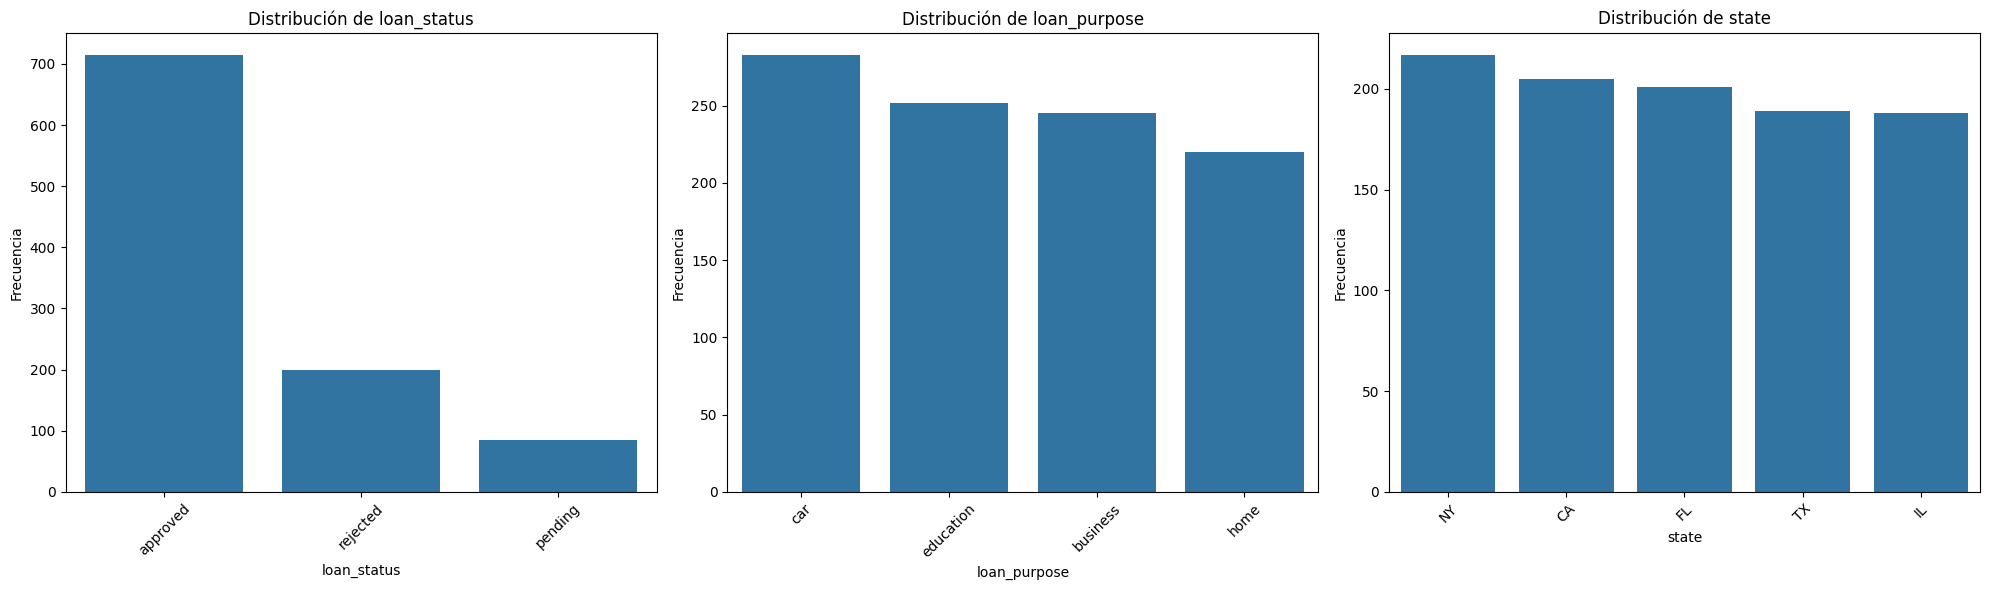

{'loan_status': approved    715
 rejected    200
 pending      85
 Name: loan_status, dtype: int64,
 'loan_purpose': car          283
 education    252
 business     245
 home         220
 Name: loan_purpose, dtype: int64,
 'state': NY    217
 CA    205
 FL    201
 TX    189
 IL    188
 Name: state, dtype: int64}

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de variables categóricas
categorical_columns = ['loan_status', 'loan_purpose', 'state']
categorical_counts = {col: loan_data[col].value_counts() for col in categorical_columns}

# Visualización de las distribuciones categóricas
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for ax, col in zip(axes, categorical_columns):
    sns.countplot(data=loan_data, x=col, ax=ax, order=loan_data[col].value_counts().index)
    ax.set_title(f'Distribución de {col}')
    ax.set_ylabel('Frecuencia')
    ax.set_xlabel(col)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

categorical_counts


C:\Users\Oscar\AppData\Local\Temp\ipykernel_16408\860661006.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan_data.corr()


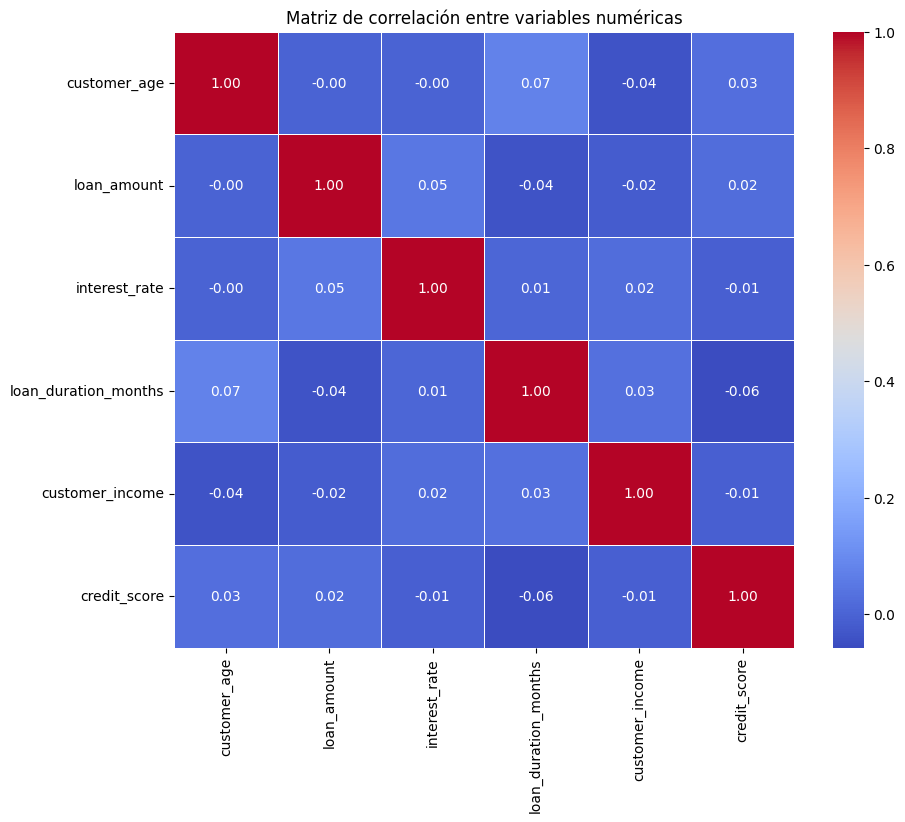

(                      customer_age  loan_amount  interest_rate  \
 customer_age              1.000000    -0.003548      -0.003075   
 loan_amount              -0.003548     1.000000       0.049282   
 interest_rate            -0.003075     0.049282       1.000000   
 loan_duration_months      0.074545    -0.038778       0.005948   
 customer_income          -0.040665    -0.019037       0.024536   
 credit_score              0.025910     0.023121      -0.009309   
 
                       loan_duration_months  customer_income  credit_score  
 customer_age                      0.074545        -0.040665      0.025910  
 loan_amount                      -0.038778        -0.019037      0.023121  
 interest_rate                     0.005948         0.024536     -0.009309  
 loan_duration_months              1.000000         0.030273     -0.057695  
 customer_income                   0.030273         1.000000     -0.009520  
 credit_score                     -0.057695        -0.009520      1

In [7]:
# Matriz de correlación
correlation_matrix = loan_data.corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

# Detección de valores atípicos en variables clave
key_columns = ['loan_amount', 'interest_rate', 'customer_income', 'credit_score']
outliers = {col: loan_data[col].quantile([0.01, 0.99]) for col in key_columns}

correlation_matrix, outliers


In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Codificar `loan_status` en valores numéricos
loan_data['loan_status_encoded'] = loan_data['loan_status'].map({'approved': 1, 'rejected': 0, 'pending': 2})

# Codificación one-hot para `loan_purpose` y `state`
encoder_purpose = OneHotEncoder(sparse_output=False, drop='first')
encoder_state = OneHotEncoder(sparse_output=False, drop='first')
encoded_purpose = encoder_purpose.fit_transform(loan_data[['loan_purpose']])
encoded_state = encoder_state.fit_transform(loan_data[['state']])

# Crear nombres de columnas para variables codificadas
purpose_columns = [f"purpose_{cat}" for cat in encoder_purpose.categories_[0][1:]]
state_columns = [f"state_{cat}" for cat in encoder_state.categories_[0][1:]]

# Crear un DataFrame para las variables codificadas y agregarlo al dataset original
encoded_purpose_df = pd.DataFrame(encoded_purpose, columns=purpose_columns)
encoded_state_df = pd.DataFrame(encoded_state, columns=state_columns)
loan_data = pd.concat([loan_data, encoded_purpose_df, encoded_state_df], axis=1)

# Filtrar valores extremos (percentiles 1 y 99)
filtered_data = loan_data[
    (loan_data['loan_amount'] >= outliers['loan_amount'][0.01]) & 
    (loan_data['loan_amount'] <= outliers['loan_amount'][0.99]) &
    (loan_data['interest_rate'] >= outliers['interest_rate'][0.01]) & 
    (loan_data['interest_rate'] <= outliers['interest_rate'][0.99]) &
    (loan_data['customer_income'] >= outliers['customer_income'][0.01]) & 
    (loan_data['customer_income'] <= outliers['customer_income'][0.99]) &
    (loan_data['credit_score'] >= outliers['credit_score'][0.01]) & 
    (loan_data['credit_score'] <= outliers['credit_score'][0.99])
]

# Estandarizar variables numéricas
scaler = StandardScaler()
numeric_cols = ['loan_amount', 'interest_rate', 'customer_income', 'credit_score']
filtered_data[numeric_cols] = scaler.fit_transform(filtered_data[numeric_cols])

# Verificar las primeras filas de los datos transformados
filtered_data.head(), filtered_data.shape


C:\Users\Oscar\AppData\Local\Temp\ipykernel_16408\702823084.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[numeric_cols] = scaler.fit_transform(filtered_data[numeric_cols])


(    loan_id  customer_age  loan_amount  interest_rate  loan_duration_months  \
 0  LN000001            56     1.130539      -1.606016                    60   
 1  LN000002            69     0.769300      -1.164848                    12   
 2  LN000003            46     0.854963      -0.180583                    48   
 3  LN000004            32     1.611200       0.845091                    36   
 4  LN000005            60    -1.156101       0.373663                    48   
 
   loan_status  customer_income loan_purpose  credit_score state  \
 0    approved         1.113380    education      0.921651    TX   
 1    approved         0.245900         home     -0.144235    IL   
 2    approved        -0.720469          car      0.946731    NY   
 3     pending         1.149372          car      0.978080    NY   
 4    approved         1.374964          car     -0.445192    NY   
 
    loan_status_encoded  purpose_car  purpose_education  purpose_home  \
 0                    1          0.

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Codificar `loan_status` en valores numéricos
loan_data['loan_status_encoded'] = loan_data['loan_status'].map({'approved': 1, 'rejected': 0, 'pending': 2})

# Codificación one-hot para `loan_purpose` y `state`
encoder_purpose = OneHotEncoder(sparse_output=False, drop='first')
encoder_state = OneHotEncoder(sparse_output=False, drop='first')
encoded_purpose = encoder_purpose.fit_transform(loan_data[['loan_purpose']])
encoded_state = encoder_state.fit_transform(loan_data[['state']])

# Crear nombres de columnas para variables codificadas
purpose_columns = [f"purpose_{cat}" for cat in encoder_purpose.categories_[0][1:]]
state_columns = [f"state_{cat}" for cat in encoder_state.categories_[0][1:]]

# Crear un DataFrame para las variables codificadas y agregarlo al dataset original
encoded_purpose_df = pd.DataFrame(encoded_purpose, columns=purpose_columns)
encoded_state_df = pd.DataFrame(encoded_state, columns=state_columns)
loan_data = pd.concat([loan_data, encoded_purpose_df, encoded_state_df], axis=1)

# Filtrar valores extremos (percentiles 1 y 99)
filtered_data = loan_data[
    (loan_data['loan_amount'] >= outliers['loan_amount'][0.01]) & 
    (loan_data['loan_amount'] <= outliers['loan_amount'][0.99]) &
    (loan_data['interest_rate'] >= outliers['interest_rate'][0.01]) & 
    (loan_data['interest_rate'] <= outliers['interest_rate'][0.99]) &
    (loan_data['customer_income'] >= outliers['customer_income'][0.01]) & 
    (loan_data['customer_income'] <= outliers['customer_income'][0.99]) &
    (loan_data['credit_score'] >= outliers['credit_score'][0.01]) & 
    (loan_data['credit_score'] <= outliers['credit_score'][0.99])
]

# Estandarizar variables numéricas
scaler = StandardScaler()
numeric_cols = ['loan_amount', 'interest_rate', 'customer_income', 'credit_score']
filtered_data[numeric_cols] = scaler.fit_transform(filtered_data[numeric_cols])

# Verificar las primeras filas de los datos transformados
filtered_data.head(), filtered_data.shape


C:\Users\Oscar\AppData\Local\Temp\ipykernel_16408\702823084.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[numeric_cols] = scaler.fit_transform(filtered_data[numeric_cols])


(    loan_id  customer_age  loan_amount  interest_rate  loan_duration_months  \
 0  LN000001            56     1.130539      -1.606016                    60   
 1  LN000002            69     0.769300      -1.164848                    12   
 2  LN000003            46     0.854963      -0.180583                    48   
 3  LN000004            32     1.611200       0.845091                    36   
 4  LN000005            60    -1.156101       0.373663                    48   
 
   loan_status  customer_income loan_purpose  credit_score state  \
 0    approved         1.113380    education      0.921651    TX   
 1    approved         0.245900         home     -0.144235    IL   
 2    approved        -0.720469          car      0.946731    NY   
 3     pending         1.149372          car      0.978080    NY   
 4    approved         1.374964          car     -0.445192    NY   
 
    loan_status_encoded  purpose_car  purpose_education  purpose_home  \
 0                    1          0.